In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_colwidth", 200)
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import umap

In [2]:
do LSA
do LDA
visualize LDA wih pyLDAvis
LDA2vec

Remove all irrelevant characters such as any non alphanumeric characters
Tokenize your text by separating it into individual words
Remove words that are not relevant, such as “@” twitter mentions or urls
Convert all characters to lowercase, in order to treat words such as “hello”, “Hello”, and “HELLO” the same
Consider combining misspelled or alternately spelled words to a single representation (e.g. “cool”/”kewl”/”cooool”)
Consider lemmatization (reduce words such as “am”, “are”, and “is” to a common form such as “be”)

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

documents = dataset.data
len(documents)

11314

In [3]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
news_df = pd.DataFrame({'document':documents})

In [8]:
# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# make everything lowercase
news_df['clean_doc'] = news_df['clean_doc'].str.lower()

# tokenization
tokenized_doc = [x.split() for x in news_df['clean_doc']]

In [13]:
news_df.head()

,document,clean_doc
0,Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe...,well sure about story seem biased what disagree with your statement that media ruin israels reputation that rediculous media most israeli media world having lived europe realize that incidences su...
1,"\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism? No, you need a little leap of faith, Jimmy. Your logic runs out\nof steam!\n\n\n\n\n\n\n\nJim,\n...",yeah expect people read actually accept hard atheism need little leap faith jimmy your logic runs steam sorry pity sorry that have these feelings denial about faith need well just pretend that wil...
2,"Although I realize that principle is not one of your strongest\npoints, I would still like to know why do do not ask any question\nof this sort about the Arab countries.\n\n If you want to conti...",although realize that principle your strongest points would still like know question this sort about arab countries want continue this think tank charade yours your fixation israel must stop might...
3,"Notwithstanding all the legitimate fuss about this proposal, how much\nof a change is it? ATT's last product in this area (a) was priced over\n$1000, as I suspect 'clipper' phones will be; (b) ca...",notwithstanding legitimate fuss about this proposal much change last product this area priced over suspect clipper phones will came customer with automatically preregistered with government author...
4,"Well, I will have to change the scoring on my playoff pool. Unfortunately\nI don't have time right now, but I will certainly post the new scoring\nrules by tomorrow. Does it matter? No, you'll ...",well will have change scoring playoff pool unfortunately have time right will certainly post scoring rules tomorrow does matter enter anyway good keith keller rangers quakers kkeller mail upenn le...


In [12]:
stop_words = stopwords.words('english')+stopwords.words('dutch')

# remove stop-words
tokenized_doc = [item for item in tokenized_doc if item not in stop_words]

# de-tokenization
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [14]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [15]:

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

10

In [16]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        

Topic 0: 
just
like
know
people
think
does
good
Topic 1: 
thanks
windows
card
drive
mail
file
advance
Topic 2: 
game
team
year
games
drive
season
good
Topic 3: 
drive
scsi
disk
hard
problem
drives
just
Topic 4: 
drive
know
thanks
does
just
scsi
drives
Topic 5: 
just
like
windows
know
does
window
file
Topic 6: 
just
like
mail
bike
thanks
chip
space
Topic 7: 
does
know
chip
like
card
clipper
encryption
Topic 8: 
like
card
sale
video
offer
jesus
good
Topic 9: 
like
drive
file
files
sounds
program
window


In [25]:
len(X_topics)

11314

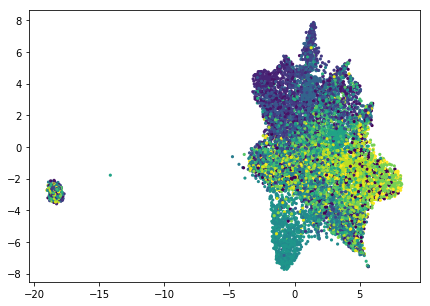

In [17]:
X_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(X_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

In [18]:
#other method with LDA
from sklearn.datasets import fetch_20newsgroups
train_raw = fetch_20newsgroups(subset='train')
test_raw = fetch_20newsgroups(subset='test')

x_train = train_raw.data
y_train = train_raw.target

x_test = test_raw.data
y_test = test_raw.target

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
def build_lda(x_train, num_of_topic=20):
    vec = CountVectorizer()
    transformed_x_train = vec.fit_transform(x_train)
    feature_names = vec.get_feature_names()
    lda = LatentDirichletAllocation(
        n_components=num_of_topic, max_iter=5, 
        learning_method='online', random_state=0)
    lda.fit(transformed_x_train)
    return lda, vec, feature_names
def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)
lda_model, vec, feature_names = build_lda(news_df['clean_doc'])
display_word_distribution(
    model=lda_model, feature_names=feature_names, 
    n_word=5)

Topic 0:
['engine', 'miles', 'speed', 'ford', 'compass']
Topic 1:
['were', 'from', 'jesus', 'armenian', 'their']
Topic 2:
['maxbyte', 'mwra', 'verlag', 'lineno', 'reservation']
Topic 3:
['with', 'this', 'have', 'that', 'from']
Topic 4:
['disease', 'gordon', 'patients', 'pitt', 'banks']
Topic 5:
['rangers', 'kings', 'leafs', 'islanders', 'devils']
Topic 6:
['window', 'motif', 'widget', 'server', 'available']
Topic 7:
['games', 'season', 'play', 'period', 'players']
Topic 8:
['that', 'they', 'with', 'have', 'this']
Topic 9:
['nrhj', 'pitching', 'wwiz', 'braves', 'gizw']
Topic 10:
['printf', 'null', 'oname', 'return', 'fprintf']
Topic 11:
['stephanopoulos', 'myers', 'package', 'morris', 'tony']
Topic 12:
['pens', 'caps', 'sweden', 'acquired', 'socket']
Topic 13:
['printer', 'cover', 'print', 'smith', 'each']
Topic 14:
['public', 'information', 'encryption', 'university', 'security']
Topic 15:
['char', 'wave', 'pointer', 'bullock', 'syndrome']
Topic 16:
['navy', 'tower', 'picture', 'sleeve

In [29]:
x_train[]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [2]:
import pyLDAvis
movies_vis_data = pyLDAvis.prepare(**movies_model_data)
pyLDAvis.display(movies_vis_data)

C:\ProgramData\Anaconda3\lib\site-packages\past\types\oldstr.py:33: DeprecationWarning: invalid escape sequence \d
  """
C:\ProgramData\Anaconda3\lib\site-packages\nose\config.py:178: DeprecationWarning: invalid escape sequence \.
  """


NameError: name 'movies_model_data' is not defined